In [5]:
import cv2

In [6]:
import random
import numpy as np
from matplotlib import pyplot as plt

In [7]:
img_gray = cv2.imread('lenna.jpg', 0) # 0读取原图的灰度图像，1 读取原图

In [11]:
cv2.imshow('lenna', img_gray)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [9]:
print(img_gray)

[[174 176 177 ... 184 162 132]
 [175 176 177 ... 189 164 130]
 [176 176 177 ... 187 163 125]
 ...
 [ 12  17  22 ...  95  95  92]
 [  9  16  24 ...  96  98 102]
 [  9  17  26 ...  91  94 103]]


In [ ]:
img = cv2.imread('lenna.jpg') 

In [14]:
cv2.imshow('lenna',img)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [16]:
print(img)

[[[137 158 219]
  [137 161 221]
  [138 162 222]
  ...
  [115 169 240]
  [ 88 146 221]
  [ 56 116 192]]

 [[136 160 220]
  [137 161 221]
  [136 161 223]
  ...
  [123 174 244]
  [ 95 149 220]
  [ 59 114 187]]

 [[135 160 222]
  [133 161 222]
  [134 162 223]
  ...
  [129 173 237]
  [101 149 215]
  [ 63 111 177]]

 ...

 [[  5  13  13]
  [ 10  17  20]
  [ 13  22  25]
  ...
  [ 49  76 150]
  [ 45  75 154]
  [ 41  71 152]]

 [[  2  10  10]
  [  9  16  19]
  [ 15  24  27]
  ...
  [ 50  76 153]
  [ 47  77 160]
  [ 49  79 166]]

 [[  2  10  10]
  [ 10  17  20]
  [ 17  26  29]
  ...
  [ 43  70 150]
  [ 43  72 157]
  [ 48  80 169]]]


In [7]:
print(img_gray.dtype)

uint8


In [8]:
print(img.shape)

(512, 512, 3)


In [6]:
print(img_gray.shape)

(512, 512)


# Basic Operations I：


In [17]:
# image crope
img_crop = img [0:100,0:200]

In [18]:
# color split
B , G , R = cv2.split(img)
cv2.imshow('B' , B)
cv2.imshow('G' , G)
cv2.imshow('R' , R)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [20]:
# 随机改变颜色
def random_light_color(img):
    # birghtness
    B , G ,R = cv2.split(img)
    
    # change  B channel
    b_rand = random.randint(-50, 50)
    if b_rand == 0:
        pass
    elif b_rand > 0:
        lim = 255 - b_rand
        B[B > lim] =255
        B[B <= lim] = (b_rand + B[B <= lim]).astype(img.dtype) #astype
    elif b_rand < 0:
        lim = 0 - b_rand
        B[B >= lim] = (b_rand + B[B >= lim]).astype(img.dtype)
    
    # change G channel 
    g_rand = random.randint(-50, 50)
    if g_rand == 0:
        pass
    elif g_rand > 0:
        lim = 255 - g_rand
        G[G > lim] =255
        G[G <= lim] = (g_rand + G[G <= lim]).astype(img.dtype) #astype
    elif g_rand < 0:
        lim = 0 - g_rand
        G[G >= lim] = (g_rand + G[G >= lim]).astype(img.dtype)
        
       # change R channel 
    r_rand = random.randint(-50, 50)
    if r_rand == 0:
        pass
    elif r_rand > 0:
        lim = 255 - r_rand
        R[R > lim] =255
        R[R <= lim] = (r_rand + R[R <= lim]).astype(img.dtype) #astype
    elif r_rand < 0:
        lim = 0 - r_rand
        R[R >= lim] = (r_rand + R[R >= lim]).astype(img.dtype)
        
        img_merge = cv2.merge((B, G, R)) #merge 合并图像
        return img_merge
        

In [21]:
img_random_color = random_light_color(img)

In [24]:
cv2.imshow('asdf' , img_random_color)
key = cv2.waitKey()

error: OpenCV(3.4.2) /opt/concourse/worker/volumes/live/9523d527-1b9e-48e0-7ed0-a36adde286f0/volume/opencv-suite_1535558719691/work/modules/highgui/src/window.cpp:356: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'imshow'


In [25]:
# gamma 校准
img_dark = cv2.imread('lenna.jpg')
cv2.imshow('img_dark', img_dark)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()
def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0/gamma
    table = []
    for i in range(256):
        table.append(((i / 255.0) ** invGamma) * 255)
    table = np.array(table).astype("uint8")
    return cv2.LUT(img_dark, table)
img_brighter = adjust_gamma(img_dark, 2)
cv2.imshow('img_dark', img_dark)
cv2.imshow('img_brighter', img_brighter)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()


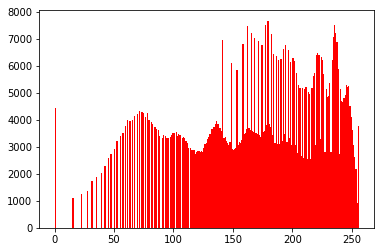

In [27]:
# histogram
img_small_brighter = cv2.resize(img_brighter, (int(img_brighter.shape[0]*0.5), int(img_brighter.shape[1]*0.5)))
plt.hist(img_brighter.flatten(), 256, [0, 256], color = 'r')
img_yuv = cv2.cvtColor(img_small_brighter, cv2.COLOR_BGR2YUV)
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])   
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)   
cv2.imshow('Color input image', img_small_brighter)
cv2.imshow('Histogram equalized', img_output)
key = cv2.waitKey(0)
if key == 27:
    exit()

# Basic Operations II：
Similarity Transform 90度角+平行线
Affine Transform 平行线 no 90度角+平行线
Perspective Transform  no 90度角+no 平行线 => 4个点（单应性） 产生8个方程（自由度）+1个限制

In [28]:
# rotation
M = cv2.getRotationMatrix2D((img.shape[1] / 2, img.shape[0] / 2), 30, 1) # center, angle, scale
img_rotate = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
cv2.imshow('rotated lenna', img_rotate)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

print(M)

[[  0.8660254    0.5        -93.70250337]
 [ -0.5          0.8660254  162.29749663]]


In [29]:
img_rotate2 = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
cv2.imshow('rotated lenna2', img_rotate2)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()